<a href="https://colab.research.google.com/github/arminsoltan/mohaymen/blob/main/Phase04/NLP_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Read Data

In [1]:
!pip install parsivar

     |████████████████████████████████| 36.2 MB 63 kB/s 
     |████████████████████████████████| 1.5 MB 54.0 MB/s 
  Created wheel for parsivar: filename=parsivar-0.2.3-py3-none-any.whl size=36492971 sha256=fb4ec39d6b37c3a04b823f86c8e68e4180addd63c9aa6dc9606286466db6db87
  Stored in directory: /root/.cache/pip/wheels/ae/67/7a/49cbf08f64d3f76a26eceaf0e481a40e233f05d4356875cbed
  Created wheel for nltk: filename=nltk-3.4.5-py3-none-any.whl size=1449920 sha256=12a364a2a5be3eda17d5fd048e8f10521f331046bff9fb1d54f8043567054e6d
  Stored in directory: /root/.cache/pip/wheels/48/8b/7f/473521e0c731c6566d631b281f323842bbda9bd819eb9a3ead
Successfully built parsivar nltk
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [2]:
!pip install hazm

     |████████████████████████████████| 316 kB 14.7 MB/s 
     |████████████████████████████████| 233 kB 23.1 MB/s 
     |████████████████████████████████| 1.4 MB 25.1 MB/s 
  Created wheel for nltk: filename=nltk-3.3-py3-none-any.whl size=1394486 sha256=5c83421c8b75e68828b05bec0c3329dafd75e3231dc849cdfc48be87dfed9ee1
  Stored in directory: /root/.cache/pip/wheels/9b/fd/0c/d92302c876e5de87ebd7fc0979d82edb93e2d8d768bf71fac4
  Created wheel for libwapiti: filename=libwapiti-0.2.1-cp37-cp37m-linux_x86_64.whl size=154850 sha256=977253ff031c4bc6fc1d37c5218c3b2cf74acab16f2b3b54ad1d12cbdedbdc4e
  Stored in directory: /root/.cache/pip/wheels/ab/b2/5b/0fe4b8f5c0e65341e8ea7bb3f4a6ebabfe8b1ac31322392dbf
Successfully built nltk libwapiti
  Attempting uninstall: nltk
    Found existing installation: nltk 3.4.5
    Uninstalling nltk-3.4.5:
      Successfully uninstalled nltk-3.4.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviou

In [3]:
!mkdir /usr/local/lib/python3.7/dist-packages/parsivar/resource/spell/
!cp -i /content/drive/MyDrive/Mohaymen/spell/mybigram_lm.pckl /usr/local/lib/python3.7/dist-packages/parsivar/resource/spell/
!cp -i /content/drive/MyDrive/Mohaymen/spell/onegram.pckl /usr/local/lib/python3.7/dist-packages/parsivar/resource/spell/

In [4]:
import parsivar
import warnings

In [5]:
warnings.filterwarnings("ignore")

In [6]:
import pandas as pd
df = pd.read_excel("/content/drive/MyDrive/Mohaymen/Phase03/Labeled-Sentences.xlsx", sheet_name="Sheet2")
df = df.drop(["good=1", "fair=0", "excellent=2"], axis=1)
df.columns = ["review", "star", "label"]

In [7]:
df.head()

,review,star,label
0,واقعا هتل خوبی بود...از لحاظ نزدیکی به دریا وم...,5,2
1,از همه مهمتر پرسنل های خیلی خوبی داشت,5,2
2,من ب این هتل امتیاز کامل میدم,5,2
3,از نظر ترانسفر فرودگاهی بسیار عالی برخورد,4,2
4,پرسنل عالی برخورد رستوران حرف نداشت,4,2


In [8]:
df.describe()

,star,label
count,703.000000,703.000000
mean,4.278805,1.645804
std,0.783878,0.738449
min,1.000000,0.000000
25%,4.000000,2.000000
50%,4.000000,2.000000
75%,5.000000,2.000000
max,5.000000,2.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0d1abf57d0>]],
      dtype=object)

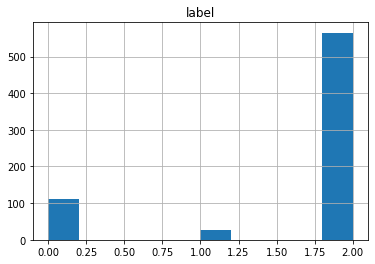

In [9]:
df.hist(column="label")

In [10]:
from parsivar import Normalizer, SpellCheck, Tokenizer, FindStems

def data_processing(review):
  normalizer = Normalizer()
  review = normalizer.normalize(review)

  checker = SpellCheck()
  review = checker.spell_corrector(review)

  tokenizer = Tokenizer()
  words = tokenizer.tokenize_words(review)

  stemmer = FindStems()
  review = [stemmer.convert_to_stem(word) for word in words]

  review = ' '.join(review)

  return review

In [11]:
# df["normalized_review"] = df["review"].apply(lambda review: data_processing(review))

In [12]:
# df.to_pickle("/content/drive/MyDrive/Mohaymen/Phase04/df.pkl")

In [14]:
import pandas as pd

df = pd.read_pickle("/content/drive/MyDrive/Mohaymen/Phase04/df.pkl")

In [15]:
df.head()

,review,star,label,normalized_review
0,واقعا هتل خوبی بود...از لحاظ نزدیکی به دریا وم...,5,2,واقعا هتل خوبی‌بود ... از لحاظ نزدیکی به دریا ...
1,از همه مهمتر پرسنل های خیلی خوبی داشت,5,2,از همه مهم پرسنل خیلی خوبی داشت&دار
2,من ب این هتل امتیاز کامل میدم,5,2,من ب این هتل امتیاز کامل مردم
3,از نظر ترانسفر فرودگاهی بسیار عالی برخورد,4,2,از نظر ترانسفر فرودگاه بسیار عالی برخورد
4,پرسنل عالی برخورد رستوران حرف نداشت,4,2,پرسنل عالی برخورد رستوران حرف داشت&دار


In [16]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [17]:
from sklearn.model_selection import train_test_split

features = df.copy()
y = features['label'].values
features = features.drop(["label", "review"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, stratify=y)

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(min_df=5)
X_train_cv = cv.fit_transform(X_train['normalized_review'])
X_test_cv = cv.transform(X_test['normalized_review'])

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer(min_df=5)
X_train_tfid = tf.fit_transform(X_train['normalized_review'])
X_test_tfid = tf.transform(X_test['normalized_review'])

# Multi Nomial Naive Bayes Classifier

Count Vectorizer

In [21]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

clf_NB = MultinomialNB().fit(X_train_cv, y_train)
predicted = clf_NB.predict(X_test_cv)
print('MultinomialNB Accuracy = {:.2f}'.format(metrics.accuracy_score(y_test, predicted)))
print(metrics.classification_report(y_test, predicted))

MultinomialNB Accuracy = 0.87
              precision    recall  f1-score   support

           0       0.72      0.59      0.65        22
           1       0.00      0.00      0.00         6
           2       0.89      0.97      0.93       113

    accuracy                           0.87       141
   macro avg       0.54      0.52      0.53       141
weighted avg       0.83      0.87      0.85       141



TfidVectorizer

In [31]:
clf_NB = MultinomialNB().fit(X_train_tfid, y_train)
predicted = clf_NB.predict(X_test_tfid)
print('MultinomialNB Accuracy = {:.2f}'.format(metrics.accuracy_score(y_test, predicted)))
print(metrics.classification_report(y_test, predicted))

MultinomialNB Accuracy = 0.84
              precision    recall  f1-score   support

           0       1.00      0.27      0.43        22
           1       0.00      0.00      0.00         6
           2       0.84      1.00      0.91       113

    accuracy                           0.84       141
   macro avg       0.61      0.42      0.45       141
weighted avg       0.83      0.84      0.80       141



# Random Forest Classifier

Countervectorizer

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

parameters = {
    "n_estimators": [10, 100, 1000],
    "criterion": ["gini", "entropy"],
    "max_features": ["log2", "sqrt"]
}

clf = GridSearchCV(RandomForestClassifier(), parameters).fit(X_train_cv, y_train)
predicted = clf.predict(X_test_cv)
print(clf.best_score_)
print(metrics.classification_report(y_test, predicted))

0.8558312262958282
              precision    recall  f1-score   support

           0       0.71      0.45      0.56        22
           1       0.00      0.00      0.00         6
           2       0.87      0.97      0.92       113

    accuracy                           0.85       141
   macro avg       0.53      0.48      0.49       141
weighted avg       0.81      0.85      0.82       141



TfidVectorizer

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

parameters = {
    "n_estimators": [10, 100, 1000],
    "criterion": ["gini", "entropy"],
    "max_features": ["log2", "sqrt"]
}

clf = GridSearchCV(RandomForestClassifier(), parameters).fit(X_train_tfid, y_train)
predicted = clf.predict(X_test_tfid)
print(clf.best_score_)
print(metrics.classification_report(y_test, predicted))

0.8505214917825537
              precision    recall  f1-score   support

           0       0.88      0.32      0.47        22
           1       0.00      0.00      0.00         6
           2       0.84      0.99      0.91       113

    accuracy                           0.84       141
   macro avg       0.57      0.44      0.46       141
weighted avg       0.81      0.84      0.80       141



# XG Boosting

CountVectorizer

In [30]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier 
parameters = {
  "n_estimators" : [10, 100, 1000],
  "max_depth" : [2, 4, 8, 16],
  "learning_rate" : [0.1, 0.01, 0.001]
}
clf = GridSearchCV(XGBClassifier(), parameters).fit(X_train_cv, y_train)
predicted = clf.predict(X_test_cv)
print(clf.best_score_)
print(metrics.classification_report(y_test, predicted))


0.8451801517067004
              precision    recall  f1-score   support

           0       0.90      0.41      0.56        22
           1       0.00      0.00      0.00         6
           2       0.86      1.00      0.93       113

    accuracy                           0.87       141
   macro avg       0.59      0.47      0.50       141
weighted avg       0.83      0.87      0.83       141



TFidVectorizer

In [33]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier 
parameters = {
  "n_estimators" : [10, 100, 1000],
  "max_depth" : [2, 4, 8, 16],
  "learning_rate" : [0.1, 0.01, 0.001]
}
clf = GridSearchCV(XGBClassifier(), parameters).fit(X_train_tfid, y_train)
predicted = clf.predict(X_test_tfid)
print(clf.best_score_)
print(metrics.classification_report(y_test, predicted))

0.8469974715549936
              precision    recall  f1-score   support

           0       0.56      0.41      0.47        22
           1       0.20      0.17      0.18         6
           2       0.90      0.96      0.93       113

    accuracy                           0.84       141
   macro avg       0.55      0.51      0.53       141
weighted avg       0.82      0.84      0.82       141

